# Basic Usage

This notebook is one small example of what is possible with Jupyter notebooks, but there are many more out there. For a quick idea about what Jupyter notebooks can do, check out the live demos available at:

* http://www.nature.com/news/ipython-interactive-demo-7.21492
* https://try.jupyter.org/

The IPython/Jupyter project maintains a curated example of amazing notebooks on a variety of topics:

https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks#entire-books-or-other-large-collections-of-notebooks-on-a-topic

## Demo

For this demonstration, I will use the example of Planck's Law describing the radiation intensity of a blackbody at a certain temperature for a given wavelength of light. This example is trivial, but it will show the various aspects of Jupyter notebooks, including:

1. Writing prose with Markdown
2. Linking in rich media
3. Writing equations in Latex
4. Writing Python code
5. Visualization

## Planck's Law

### 1. Prose in Markdown

Planck's Law describes the electromagnetic radiation emited by a black body at a given temperature for a given wavelength.

This description is made possible by using a "Markdown" cell block. Markdown is an incredibly simple yet powerful markup language for formatting text. Documentation for Markdown is readily available, including at the following links:

* https://daringfireball.net/projects/markdown/
* https://help.github.com/articles/markdown-basics/
* https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet
* https://guides.github.com/features/mastering-markdown/

Get to know Markdown -- it is used in Jupyter notebooks, on Github, and in many other places.

To use Markdown in a cell, first create a new cell by clicking the "Insert" menu on your toolbar and then the "Insert Cell Below" menu item (shortcut: CTRL + M, b). 

By default, new cells are code cells. Change the type of cell by clicking the "Cell" menu on your toolbar and then clicking "Cell Type -> Markdown" (shortcut: CTRL + M + m).

This is now a new code cell that is parsed as Markdown. I can now continue my description of Planck's Law.

Some quick facts about Planck's Law in the form of an unordered list. I am using asterisks "*" for my bullet points, but you can also use dashes "-" and plus signs "+". See [Github's documentation](https://help.github.com/articles/markdown-basics/#unordered-lists)) for more information.

* Named after scientist Max Planck
* Originall propsed in 1900
* There were two competing descriptions of the spectrum of radiation that were not entirely accurate

To list these two competing descriptions, I can use an ordered list (see [Github's documentation](https://help.github.com/articles/markdown-basics/#ordered-lists)):

Competing descriptions:

1. Wien approximation
2. Rayleigh–Jeans law

To add more information, I could use a nested list ([Github's documentation](https://help.github.com/articles/markdown-basics/#nested-lists)):

1. Wien approximation
    * Inaccurate for long wavelengths
2. Rayleigh-Jeans law
    * Inaccurate for short wavelengths
    
For more information, I can refer the reader to the [Wikipedia page on Planck's Law](https://en.wikipedia.org/wiki/Planck%27s_law). To make a hyperlink, you can write the link text within square brackets "[TEXT]" and immediatelly follow the text with the URL within parentheses "(URL)" (see [Github's documentation](https://help.github.com/articles/markdown-basics/#links)).

### 2. Rich media
I can even pull in images from the web to include in my notebook. To create a link to an image, write the URL to the image as a normal link, but pre-pend an exclamation point. For example, "\!\[link text\](URL)":

![An SVG Image](https://upload.wikimedia.org/wikipedia/commons/1/19/Black_body.svg)

Linked image by Darth Kule (Own work) [Public domain], via Wikimedia Commons.

Using some code from the IPython project, I can even embed a YouTube video by passing the video ID to the `YouTubeVideo` function [documented here](http://ipython.readthedocs.org/en/stable/api/generated/IPython.display.html?highlight=youtube#IPython.display.YouTubeVideo):

In [8]:
from IPython.display import YouTubeVideo

# Title: Max Planck Solves the Ultraviolet Catastrophe for Blackbody Radiation | Doc Physics
# Author: Doc Schuster
YouTubeVideo('H-7f-3OAXm0')

### 3. Equations

Markdown allows you to write mathematical equations using [LaTeX](https://www.latex-project.org/) that will be rendered using [MathJax](https://www.mathjax.org/). The simplest way of including an equations is to wrap the LaTeX code in sets of double dollar signs, "$$":

Planck Equation:

$$ B_{\lambda}(\lambda, T) = \frac{2hc^2}{\lambda^5} \frac{1}{e^{\frac{hc}{\lambda k_B T}} - 1}$$

Another, more difficult, method of writing equations is to instead use a cell block as a LaTeX block. This may be accomplished using "cell magics", specifically "%%latex":

In [9]:
%%latex
\begin{aligned}
B_{\lambda}(\lambda, T) = \frac{2hc^2}{\lambda^5} \frac{1}{e^{\frac{hc}{\lambda k_B T}} - 1}
\end{aligned}

<IPython.core.display.Latex object>

You can also use "line magics" to write LaTeX inline in Markdown cells:

%latex \begin{aligned} B_{\lambda}(\lambda, T) = \frac{2hc^2}{\lambda^5} \frac{1}{e^{\frac{hc}{\lambda k_B T}} - 1} \end{aligned}

### 4. Code

You can, of course, also include code in the notebook as code is the default cell type.

Let's create a function for Planck's Law:

In [10]:
import numpy as np


def planck(wavelength, temp):
    """ Return the emitted radiation from a blackbody of a given temp and wavelength
    
    Args:
        wavelength (float): wavelength (m)
        temp (float): temperature of black body (Kelvin)
        
    Returns:
        float: spectral radiance (W / (sr m^3))
        
    """
    k_b = 1.3806488e-23  # J/K  Boltzmann constant
    h = 6.626070040e-34  # J s - Planck's constant
    c = 3e8  # m/s - speed of light
    
    return ((2 * h * c ** 2) / wavelength ** 5 * 
            1 / (np.exp(h * c / (wavelength * k_b * temp)) - 1))

In [11]:
for temp in (3000, 4000, 5000):
    rad = planck(0.5e-6, temp)
    rad_kW_per_sr_m2_nm = rad / 1e3 / 1e9  # convert from W to kW and m to nm
    print('%.3f K: %.5f kW/(sr m^2 nm)' % (temp, rad_kW_per_sr_m2_nm))

3000.000 K: 0.25890 kW/(sr m^2 nm)
4000.000 K: 2.85480 kW/(sr m^2 nm)
5000.000 K: 12.07559 kW/(sr m^2 nm)


### 5. Visualization

Not only can the notebooks display console style text outputs from the code, but it can also display and save very detaild plots.

Below I use the Python plotting library, [matplotlib](http://matplotlib.org/), to reproduce the plot displayed in section 2.

In [12]:
# Import and alias to "plt"
import matplotlib.pyplot as plt

In [13]:
# Calculate
wavelength = np.linspace(1e-7, 3e-6, 1000)
temp = np.array([3000, 4000, 5000])

rad = np.zeros((wavelength.size, temp.size), dtype=np.float)

for i, t in enumerate(temp):
    rad[:, i] = planck(wavelength, t)

<IPython.core.display.Javascript object>


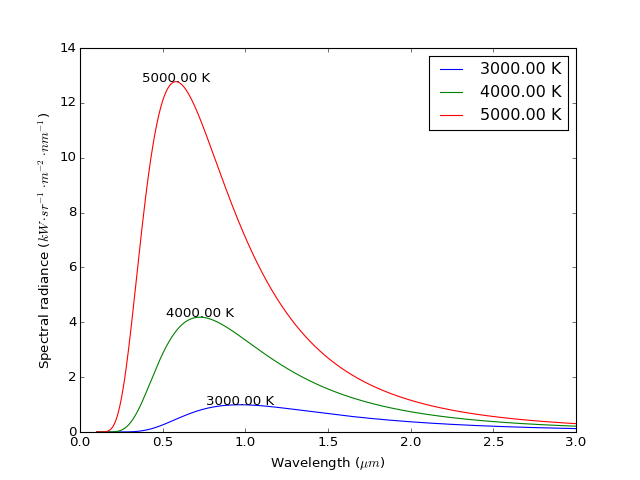

In [14]:
% matplotlib nbagg

# Plot
text_x = wavelength[rad.argmax(axis=0)] * 1e6
text_y = rad.max(axis=0) / 1e3 / 1e9
temp_str = ['%.2f K' % t for t in temp]

fig, ax = plt.subplots()
ax.plot(wavelength * 1e6, rad / 1e3 / 1e9)
for _x, _y, _temp in zip(text_x, text_y, temp_str):
    ax.text(_x, _y, _temp, ha='center')

plt.legend(labels=['%.2f K' % t for t in temp])

plt.xlabel(r'Wavelength ($\mu m$)')
plt.ylabel(r'Spectral radiance ($kW \cdot sr^{-1} \cdot m^{-2} \cdot nm^{-1}$)')